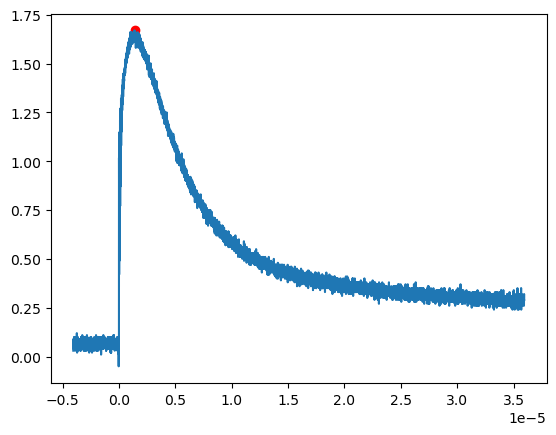

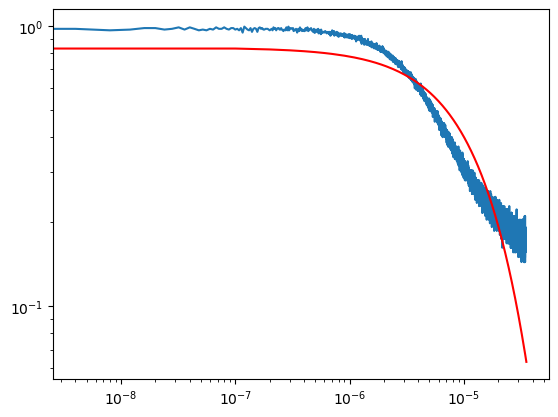

0.8362760229576945 1.3639928507224855e-05


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

path = "/Users/yukiharuta/Downloads/D4.CSV"

# data reading
column_names=['Time','CH']
df = pd.read_csv(path, names=column_names, header=None)
X = df['Time'].to_list()
Y = df['CH'].to_list()

# plot
offset_index = Y.index(max(Y))
t_offset = X[offset_index] # The time when Y is maximum
plt.plot(X,Y)
plt.scatter([t_offset],[max(Y)],c='red')
plt.show()

# normalize
X_norm = X[offset_index:]
X_norm = [n - t_offset for n in X_norm]
Y_norm = Y[offset_index:]
Y_norm = [n/max(Y) for n in Y_norm]

# Single-Exponential
def f(t,A,tau):
    y = A * np.exp(-t/tau)
    return y

# initial guess for the parameters of the first peak
A_guess = 1
tau_guess = 1e-5

# fit the function to the data
popt, pcov = curve_fit(f, X_norm, Y_norm, p0=[A_guess, tau_guess])
A_fit = popt[0]
tau_fit = popt[1]

X_fit = np.arange(0,max(X_fit),1e-7)
Y_fit = [f(n,A_fit,tau_fit) for n in X_fit]

# plot
plt.plot(X_norm,Y_norm)
# plt.plot(X_fit,Y_fit,c='red')
plt.xscale('log')
plt.yscale('log')
plt.show()

print(A_fit, tau_fit)

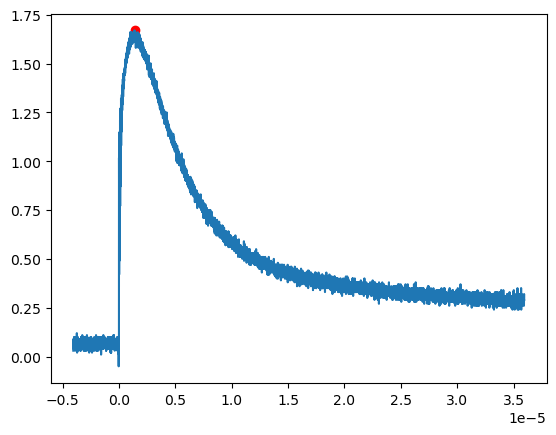

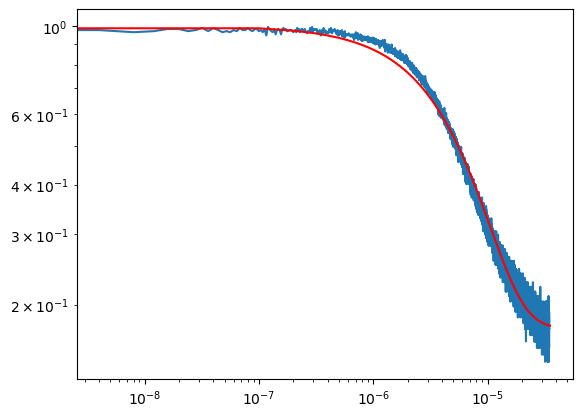

0.825039202806061 5.916566211684976e-06 169.53841724337903


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

path = "/Users/yukiharuta/Downloads/D4.CSV"

# data reading
column_names=['Time','CH']
df = pd.read_csv(path, names=column_names, header=None)
X = df['Time'].to_list()
Y = df['CH'].to_list()

# plot
offset_index = Y.index(max(Y))
t_offset = X[offset_index] # The time when Y is maximum
plt.plot(X,Y)
plt.scatter([t_offset],[max(Y)],c='red')
plt.show()

# normalize
X_norm = X[offset_index:]
X_norm = [n - t_offset for n in X_norm]
Y_norm = Y[offset_index:]
Y_norm = [n/max(Y) for n in Y_norm]

# Bi-Exponential
def biexp(t,A,tau1,tau2):
    y = A * np.exp(-t/tau1) + (1-A) * np.exp(-t/tau2)
    return y

# initial guess for the parameters of the first peak
A_guess = 0.5
tau1_guess = 1e-6
tau2_guess = 1e-5

# fit the function to the data
popt, pcov = curve_fit(biexp, X_norm, Y_norm, p0=[A_guess, tau1_guess, tau2_guess])
A_fit = popt[0]
tau1_fit = popt[1]
tau2_fit = popt[2]

X_fit = np.arange(0,max(X_fit),1e-7)
Y_fit = [biexp(n,A_fit,tau1_fit,tau2_fit) for n in X_fit]

# plot
plt.plot(X_norm,Y_norm)
plt.plot(X_fit,Y_fit,c='red')
plt.xscale('log')
plt.yscale('log')
plt.show()

print(A_fit, tau1_fit, tau2_fit)

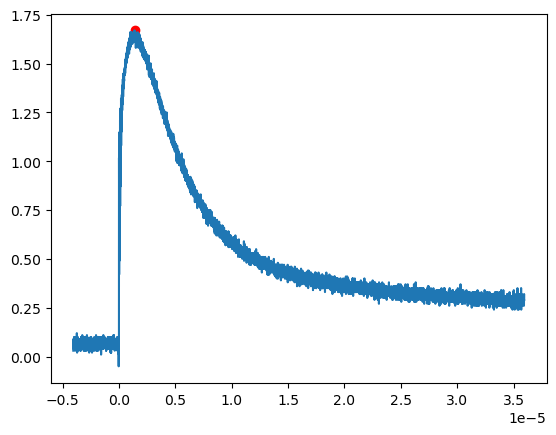

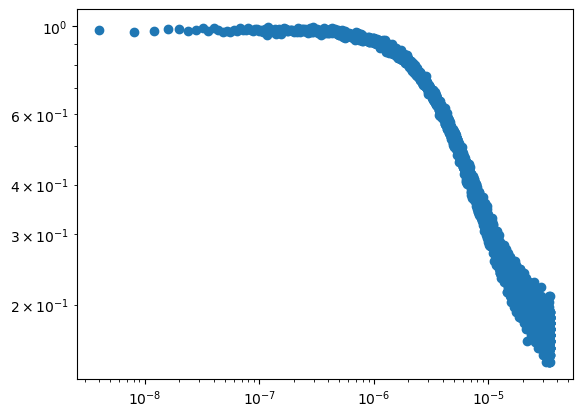

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

path = "/Users/yukiharuta/Downloads/D4.CSV"

# data reading
column_names=['Time','CH']
df = pd.read_csv(path, names=column_names, header=None)
X = df['Time'].to_list()
Y = df['CH'].to_list()

# plot
offset_index = Y.index(max(Y))
t_offset = X[offset_index] # The time when Y is maximum
plt.plot(X,Y)
plt.scatter([t_offset],[max(Y)],c='red')
plt.show()

# normalize
X_norm = X[offset_index:]
X_norm = [n - t_offset for n in X_norm]
Y_norm = Y[offset_index:]
Y_norm = [n/max(Y) for n in Y_norm]

# Find the KINK
logX = [np.log(x) for x in X_norm]
logY = [np.log(y) for y in Y_norm]

# plot
plt.scatter(X_norm,Y_norm)
# plt.plot(X_fit,Y_fit,c='red')
plt.xscale('log')
plt.yscale('log')
plt.show()

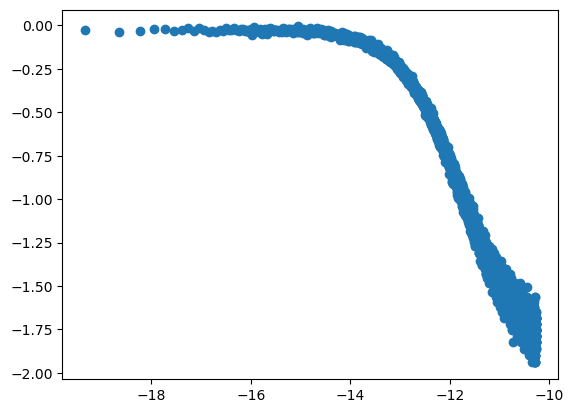

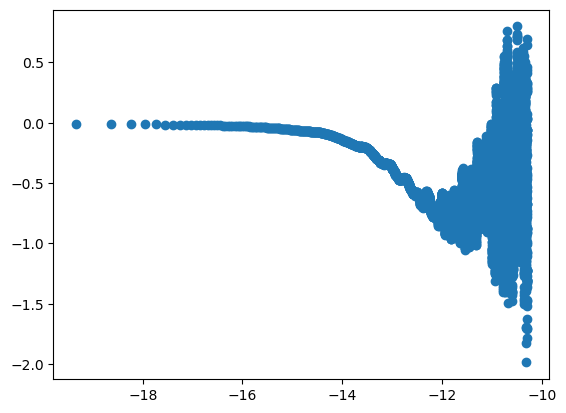

In [31]:
# Find the KINK
X_ = X_norm[1:]
Y_ = Y_norm[1:]
logX = [np.log(x) for x in X_]
logY = [np.log(y) for y in Y_]

plt.scatter(logX,logY)
plt.show()

fit_length = 200 # points
dYdX = []

for i in range(len(logX)-fit_length):
    linear_X = logX[i:i+fit_length]
    linear_Y = logY[i:i+fit_length]
    slope = np.polyfit(linear_X, linear_Y, 1)[0]
    dYdX.append(slope)

plt.scatter(logX[:-fit_length],dYdX)